# El movimiento browniano y la dinámica de Langevin

**Mirar en el documento de JL García Palacios la introducción al movimiento browniano**

## Dinámica clásica newtoniana

### Una partícula en caida libre

In [92]:
import simtk.unit as unit
import numpy as np

In [93]:
mass = 0.2 * unit.kilogram
initial_position = np.array([0.0, 0.0, 1000.0]) * unit.meters
initial_velocity = np.array([10.0, 0.0, 0.0]) * unit.meters/unit.seconds

def force(position):
    return np.array([0.0, 0.0, -9.8]) * unit.newtons

In [109]:
initial_time = 0.0 * unit.seconds
integration_timestep = 0.005 * unit.seconds
n_steps = 1250

In [110]:
positions = np.empty([n_steps, 3]) * unit.meters
velocities = np.empty([n_steps, 3]) * unit.meters/unit.seconds
times = np.empty([n_steps]) * unit.seconds

positions[0,:] = initial_position
velocities[0,:] = initial_velocity
times[0] = initial_time

time_i = initial_time
position_i = initial_position
velocity_i = initial_velocity
force_i = force(initial_position)

for step_index in range(1,n_steps):
    
    position_f = position_i + velocity_i * integration_timestep + 0.5 * (force_i/mass) * integration_timestep**2
    velocity_f = velocity_i + force_i/mass * integration_timestep
    force_f = force(position_f)
    time_f = time_i + integration_timestep
    
    positions[step_index,:] = position_f
    velocities[step_index,:] = velocity_f
    times[step_index] = time_f
    
    position_i = position_f
    velocity_i = velocity_f
    force_i = force_f
    time_i = time_f

In [111]:
from matplotlib import pyplot as plt

In [112]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

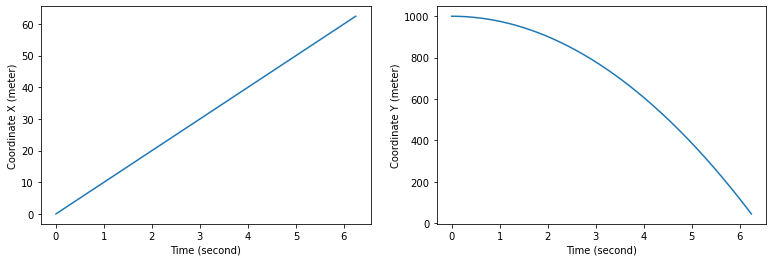

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axs[0].plot(times, positions[:,0])
axs[0].set_xlabel('Time ({})'.format(times.unit))
axs[0].set_ylabel('Coordinate X ({})'.format(positions.unit))

axs[1].plot(times, positions[:,2])
axs[1].set_xlabel('Time ({})'.format(times.unit))
axs[1].set_ylabel('Coordinate Y ({})'.format(positions.unit))

plt.show()

### Un oscilador armónico

In [114]:
mass = 0.2 * unit.kilogram
initial_position = np.array([0.5, 0.0, 0.0]) * unit.meters
initial_velocity = np.array([0.0, 0.0, 0.0]) * unit.meters/unit.seconds
k = 10.0 * unit.joules/unit.meters**2

def force(position, k):
    return -k*position


In [115]:
initial_time = 0.0 * unit.seconds
integration_timestep = 0.005 * unit.seconds
n_steps = 1250

In [116]:
positions = np.empty([n_steps, 3]) * unit.meters
velocities = np.empty([n_steps, 3]) * unit.meters/unit.seconds
times = np.empty([n_steps]) * unit.seconds

positions[0,:] = initial_position
velocities[0,:] = initial_velocity
times[0] = initial_time

time_i = initial_time
position_i = initial_position
velocity_i = initial_velocity
force_i = force(initial_position, k)

for step_index in range(1,n_steps):
    
    position_f = position_i + velocity_i * integration_timestep + 0.5 * (force_i/mass) * integration_timestep**2
    velocity_f = velocity_i + force_i/mass * integration_timestep
    force_f = force(position_f, k)
    time_f = time_i + integration_timestep
    
    positions[step_index,:] = position_f
    velocities[step_index,:] = velocity_f
    times[step_index] = time_f
    
    position_i = position_f
    velocity_i = velocity_f
    force_i = force_f
    time_i = time_f

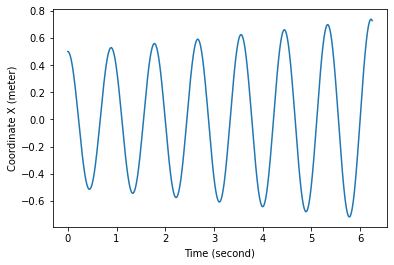

In [117]:
plt.plot(times, positions[:,0])
plt.xlabel('Time ({})'.format(times.unit))
plt.ylabel('Coordinate X ({})'.format(positions.unit))

plt.show()

Hacer referencia a más información sobre integradores y a un ejemplo de simulación de dinámica clásica (una pelota rebotando).

## Viscosidad y fricción del medio o amortiguamiento

### Una partícula en caida libre en un fluido viscoso

In [118]:
mass = 0.2 * unit.kilogram
initial_position = np.array([0.0, 0.0, 1000.0]) * unit.meters
initial_velocity = np.array([10.0, 0.0, 0.0]) * unit.meters/unit.seconds

def force(position):
    return np.array([0.0, 0.0, -9.8]) * unit.newtons

initial_time = 0.0 * unit.seconds
integration_timestep = 0.005 * unit.seconds
n_steps = 1250

In [119]:
viscosity = 1.34 * unit.pascals * unit.seconds # glycerine
radius = 1.0 * unit.centimeter
drag = 6 *np.pi * viscosity * radius

In [120]:
positions = np.empty([n_steps, 3]) * unit.meters
velocities = np.empty([n_steps, 3]) * unit.meters/unit.seconds
times = np.empty([n_steps]) * unit.seconds

positions[0,:] = initial_position
velocities[0,:] = initial_velocity
times[0] = initial_time

time_i = initial_time
position_i = initial_position
velocity_i = initial_velocity
force_i = force(initial_position) - drag*initial_velocity

for step_index in range(1,n_steps):
    
    position_f = position_i + velocity_i * integration_timestep + 0.5 * (force_i/mass) * integration_timestep**2
    velocity_f = velocity_i + force_i/mass * integration_timestep
    force_f = force(position_f) - drag*velocity_f
    time_f = time_i + integration_timestep
    
    positions[step_index,:] = position_f
    velocities[step_index,:] = velocity_f
    times[step_index] = time_f
    
    position_i = position_f
    velocity_i = velocity_f
    force_i = force_f
    time_i = time_f

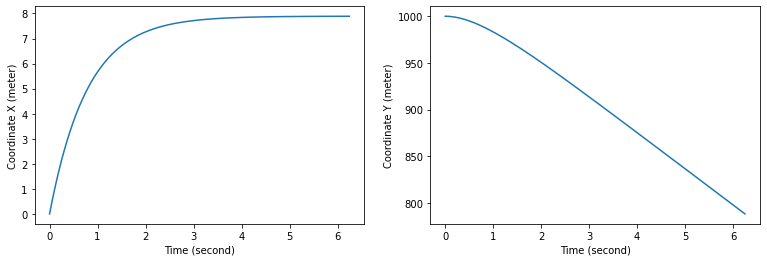

In [121]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axs[0].plot(times, positions[:,0])
axs[0].set_xlabel('Time ({})'.format(times.unit))
axs[0].set_ylabel('Coordinate X ({})'.format(positions.unit))

axs[1].plot(times, positions[:,2])
axs[1].set_xlabel('Time ({})'.format(times.unit))
axs[1].set_ylabel('Coordinate Y ({})'.format(positions.unit))

plt.show()

### Un oscilador armónico armotiguado

In [123]:
mass = 0.2 * unit.kilogram
initial_position = np.array([0.5, 0.0, 0.0]) * unit.meters
initial_velocity = np.array([0.0, 0.0, 0.0]) * unit.meters/unit.seconds
k = 10.0 * unit.joules/unit.meters**2

def force(position, k):
    return -k*position

viscosity = 1.34 * unit.pascals * unit.seconds # glycerine
radius = 1.0 * unit.centimeter
drag = 6 *np.pi * viscosity * radius

initial_time = 0.0 * unit.seconds
integration_timestep = 0.005 * unit.seconds
n_steps = 1250

positions = np.empty([n_steps, 3]) * unit.meters
velocities = np.empty([n_steps, 3]) * unit.meters/unit.seconds
times = np.empty([n_steps]) * unit.seconds

positions[0,:] = initial_position
velocities[0,:] = initial_velocity
times[0] = initial_time

time_i = initial_time
position_i = initial_position
velocity_i = initial_velocity
force_i = force(initial_position, k) - drag*initial_velocity

for step_index in range(1,n_steps):
    
    position_f = position_i + velocity_i * integration_timestep + 0.5 * (force_i/mass) * integration_timestep**2
    velocity_f = velocity_i + force_i/mass * integration_timestep
    force_f = force(position_f, k) - drag*velocity_f
    time_f = time_i + integration_timestep
    
    positions[step_index,:] = position_f
    velocities[step_index,:] = velocity_f
    times[step_index] = time_f
    
    position_i = position_f
    velocity_i = velocity_f
    force_i = force_f
    time_i = time_f

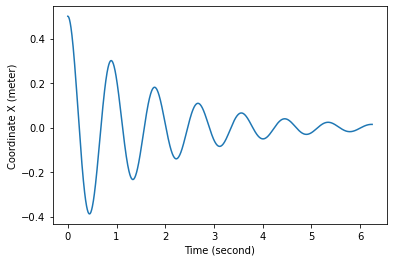

In [124]:
plt.plot(times, positions[:,0])
plt.xlabel('Time ({})'.format(times.unit))
plt.ylabel('Coordinate X ({})'.format(positions.unit))

plt.show()

## Dinámica de Langevin